In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import cactas as C

In [3]:
import tensorflow as tf
gpu_available = tf.test.is_gpu_available()
gpu_available

2023-09-24 00:43:50.728972: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


2023-09-24 00:43:54.196672: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-24 00:43:54.199523: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-09-24 00:43:54.564884: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 00:43:54.567707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 3

True

In [4]:
DATAPATH='/raid/mpsych/CACTAS/DATA/ESUS'

In [5]:
images, labels = C.Helper.load_data(DATAPATH)

In [6]:
X_train, y_train, X_test, y_test = C.Helper.split_patients(images, labels)

In [7]:
X_train, y_train, X_test, y_test = C.Helper.normalization(DATAPATH, X_train, y_train, X_test, y_test)

In [8]:
X_train, y_train, X_test, y_test = C.Helper.extract_slices(X_train, y_train, X_test, y_test)

(13485, 512, 512, 1) (13485, 512, 512, 1) (3281, 512, 512, 1) (3281, 512, 512, 1)


In [9]:
X_train, y_train, X_test, y_test = C.Helper.filter_slices(X_train, y_train, X_test, y_test)

(588, 512, 512, 1) (588, 512, 512, 1) (126, 512, 512, 1) (126, 512, 512, 1)


In [10]:
train_gen = C.Helper.augment(X_train, y_train)

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [11]:
model = C.Helper.create_unet(X_train[0].shape)

2023-09-24 00:46:27.921736: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 00:46:27.924303: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 00:46:27.934311: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1871] Adding visible gpu devices: 0, 1
2023-09-24 00:46:27.937628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-09-24 00:46:27.940122: I tensorflow/core

In [12]:
model, history = C.Helper.train_unet(train_gen, X_train, y_train, X_test, y_test, model, epochs=200)

2023-09-24 00:46:29.258933: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-09-24 00:46:29.280778: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245800000 Hz


Epoch 1/200


2023-09-24 00:46:30.535463: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-09-24 00:46:31.836632: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-09-24 00:46:33.480686: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-09-24 00:46:33.480708: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-09-24 00:46:33.481583: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-09-24 00:46:33.583754: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-09-24 00:46:35.026973: I tensorflow/stream_exec

19/19 [==============================] - 59s 2s/step - loss: 0.4681 - iou: 1.8991e-04 - iou_thresholded: 8.7811e-04 - val_loss: 0.0108 - val_iou: 1.0168e-04 - val_iou_thresholded: 5.0855e-04
Epoch 2/200
19/19 [==============================] - 18s 968ms/step - loss: 0.0055 - iou: 3.5379e-04 - iou_thresholded: 8.5164e-04 - val_loss: 0.0027 - val_iou: 3.2574e-04 - val_iou_thresholded: 5.0855e-04
Epoch 3/200
19/19 [==============================] - 18s 969ms/step - loss: 0.0017 - iou: 5.5248e-04 - iou_thresholded: 9.0106e-04 - val_loss: 0.0023 - val_iou: 7.8121e-04 - val_iou_thresholded: 5.0855e-04
Epoch 4/200
19/19 [==============================] - 18s 971ms/step - loss: 0.0014 - iou: 0.0011 - iou_thresholded: 8.8371e-04 - val_loss: 0.0022 - val_iou: 0.0012 - val_iou_thresholded: 5.0855e-04
Epoch 5/200
19/19 [==============================] - 18s 966ms/step - loss: 0.0013 - iou: 0.0013 - iou_thresholded: 9.2526e-04 - val_loss: 0.0021 - val_iou: 9.6381e-04 - val_iou_thresholded: 5.0855e-

19/19 [==============================] - 18s 964ms/step - loss: 2.5322e-04 - iou: 0.3910 - iou_thresholded: 0.5310 - val_loss: 6.3578e-04 - val_iou: 0.3793 - val_iou_thresholded: 0.4420
Epoch 43/200
19/19 [==============================] - 18s 967ms/step - loss: 2.5524e-04 - iou: 0.4061 - iou_thresholded: 0.5323 - val_loss: 6.7470e-04 - val_iou: 0.3798 - val_iou_thresholded: 0.4537
Epoch 44/200
19/19 [==============================] - 18s 963ms/step - loss: 2.3623e-04 - iou: 0.4202 - iou_thresholded: 0.5563 - val_loss: 6.9024e-04 - val_iou: 0.3811 - val_iou_thresholded: 0.4484
Epoch 45/200
19/19 [==============================] - 18s 967ms/step - loss: 2.3810e-04 - iou: 0.4206 - iou_thresholded: 0.5584 - val_loss: 8.9581e-04 - val_iou: 0.3588 - val_iou_thresholded: 0.4045
Epoch 46/200
19/19 [==============================] - 18s 966ms/step - loss: 2.4106e-04 - iou: 0.4246 - iou_thresholded: 0.5521 - val_loss: 8.0878e-04 - val_iou: 0.3728 - val_iou_thresholded: 0.4140
Epoch 47/200
19/19

19/19 [==============================] - 18s 968ms/step - loss: 3.1616e-04 - iou: 0.3855 - iou_thresholded: 0.5141 - val_loss: 0.0011 - val_iou: 0.3502 - val_iou_thresholded: 0.3919
Epoch 84/200
19/19 [==============================] - 18s 965ms/step - loss: 2.3664e-04 - iou: 0.4431 - iou_thresholded: 0.5763 - val_loss: 9.4749e-04 - val_iou: 0.3702 - val_iou_thresholded: 0.4481
Epoch 85/200
19/19 [==============================] - 18s 966ms/step - loss: 1.8377e-04 - iou: 0.4945 - iou_thresholded: 0.6325 - val_loss: 0.0010 - val_iou: 0.3410 - val_iou_thresholded: 0.3647
Epoch 86/200
19/19 [==============================] - 18s 966ms/step - loss: 1.6731e-04 - iou: 0.5264 - iou_thresholded: 0.6486 - val_loss: 9.4249e-04 - val_iou: 0.3937 - val_iou_thresholded: 0.4533
Epoch 87/200
19/19 [==============================] - 18s 965ms/step - loss: 1.5590e-04 - iou: 0.5507 - iou_thresholded: 0.6770 - val_loss: 9.7771e-04 - val_iou: 0.3985 - val_iou_thresholded: 0.4495
Epoch 88/200
19/19 [======

Epoch 125/200
19/19 [==============================] - 18s 963ms/step - loss: 9.2403e-05 - iou: 0.6902 - iou_thresholded: 0.7760 - val_loss: 0.0019 - val_iou: 0.4248 - val_iou_thresholded: 0.4518
Epoch 126/200
19/19 [==============================] - 18s 968ms/step - loss: 9.5913e-05 - iou: 0.6917 - iou_thresholded: 0.7731 - val_loss: 0.0019 - val_iou: 0.4254 - val_iou_thresholded: 0.4601
Epoch 127/200
19/19 [==============================] - 18s 964ms/step - loss: 9.9156e-05 - iou: 0.6851 - iou_thresholded: 0.7669 - val_loss: 0.0021 - val_iou: 0.4104 - val_iou_thresholded: 0.4361
Epoch 128/200
19/19 [==============================] - 18s 967ms/step - loss: 9.1567e-05 - iou: 0.6943 - iou_thresholded: 0.7809 - val_loss: 0.0025 - val_iou: 0.4026 - val_iou_thresholded: 0.4185
Epoch 129/200
19/19 [==============================] - 18s 966ms/step - loss: 8.9132e-05 - iou: 0.7029 - iou_thresholded: 0.7841 - val_loss: 0.0027 - val_iou: 0.3981 - val_iou_thresholded: 0.4137
Epoch 130/200
19/19 

Epoch 167/200
19/19 [==============================] - 18s 967ms/step - loss: 6.5512e-05 - iou: 0.7682 - iou_thresholded: 0.8325 - val_loss: 0.0029 - val_iou: 0.4186 - val_iou_thresholded: 0.4378
Epoch 168/200
19/19 [==============================] - 18s 965ms/step - loss: 6.6946e-05 - iou: 0.7628 - iou_thresholded: 0.8329 - val_loss: 0.0042 - val_iou: 0.4020 - val_iou_thresholded: 0.4130
Epoch 169/200
19/19 [==============================] - 18s 967ms/step - loss: 6.6395e-05 - iou: 0.7661 - iou_thresholded: 0.8330 - val_loss: 0.0031 - val_iou: 0.4190 - val_iou_thresholded: 0.4337
Epoch 170/200
19/19 [==============================] - 18s 967ms/step - loss: 6.4218e-05 - iou: 0.7721 - iou_thresholded: 0.8360 - val_loss: 0.0039 - val_iou: 0.3990 - val_iou_thresholded: 0.4091
Epoch 171/200
19/19 [==============================] - 18s 968ms/step - loss: 6.6467e-05 - iou: 0.7656 - iou_thresholded: 0.8311 - val_loss: 0.0027 - val_iou: 0.4364 - val_iou_thresholded: 0.4522
Epoch 172/200
19/19 

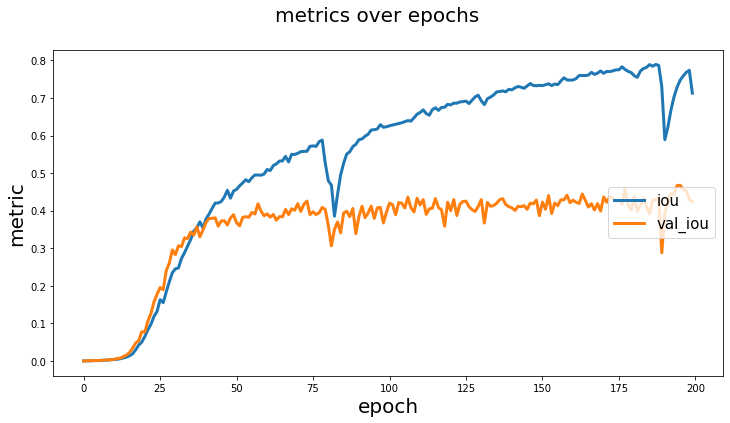

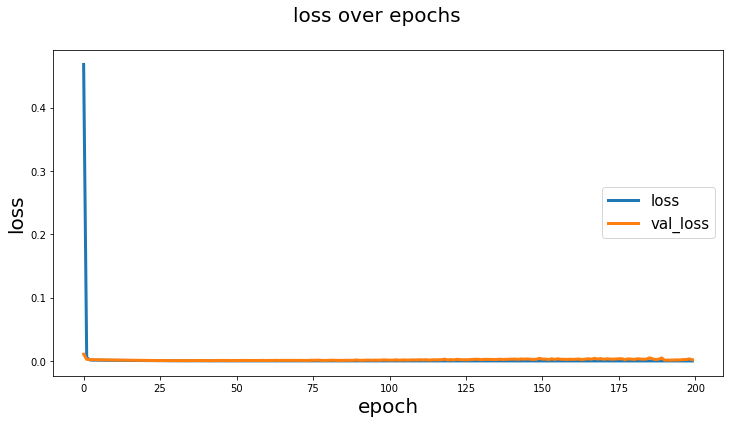

In [13]:
C.Helper.visualize_graph(history)

In [14]:
y_pred = C.Helper.prediction(X_test, model)

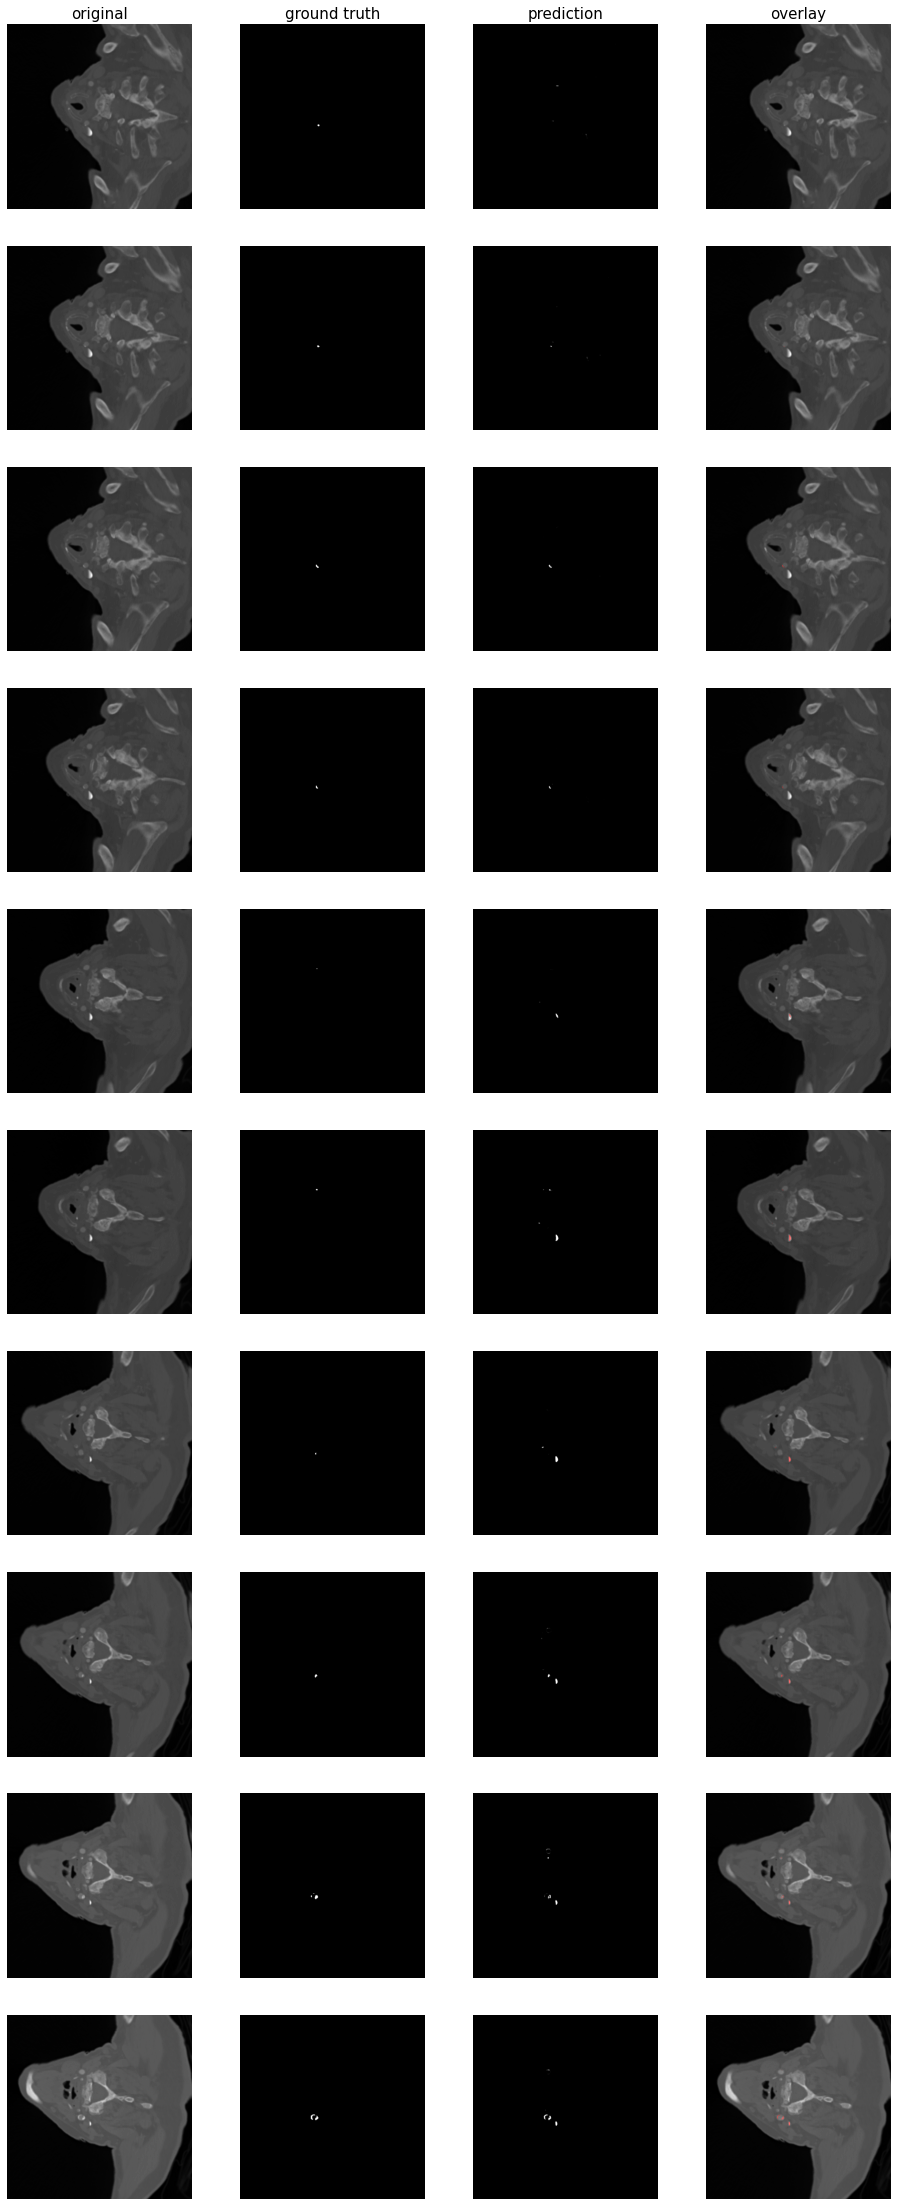

In [15]:
C.Helper.visualize_result(X_test, y_test, y_pred)

In [16]:
C.Helper.evaluate(X_test, y_test, model)

4/4 [==============================] - 1s 210ms/step - loss: 0.0021 - iou: 0.4240 - iou_thresholded: 0.4567
